In [1]:
#import the neccesary libraries
from datetime import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import time
import matplotlib as mpl
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import re
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from chart_studio import plotly
from plotly import tools
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
import shap
from textblob import TextBlob
import string, os, random
from textstat import flesch_reading_ease
from nltk.corpus import stopwords
from sklearn.metrics import silhouette_score
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from fbprophet import Prophet
import numpy as np
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
words = set(nltk.corpus.words.words())
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
import snscrape.modules.twitter as sntwitter

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False
pd.set_option('display.max_columns', None)
from datetime import datetime,timedelta

/Users/hyacinthampadu/miniforge3/envs/py36/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hyacinthampadu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hyacinthampadu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
Db_host='127.0.0.1'
Db_name='postgres'
Db_user='postgres'
Db_pass='Brunei42i'

In [3]:
conn = psycopg2.connect(host=Db_host, dbname=Db_name, user=Db_user,password=Db_pass)
conn.set_session(autocommit=True)
cur = conn.cursor()

In [4]:
parallel=pd.read_sql_query("SELECT * FROM parallel_trades",conn)
parallel.head()

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


,chain,collectionaddress,collectionname,exchange,logindex,maker,price,quotecurrency,side,taker,thumbnailurl,timestamp,tokenid,tx,txindex,date,id
0,eth,0x76be3b62873462d2142405439777e971754e8e77,Parallel Alpha,opensea,514,0x661d0eaf85b3af039aa457473e5d448b2ce38ce6,0.0013,ETH,buy,0xb9dfffe3dd0956455ebba025bc3f6de4ca6bed87,https://storage.googleapis.com/parsec-nft-stor...,1649804649,10545.0,0xcc40b548c1d454b42c0d8a06d8adb23ffb514b63fa2d...,210.0,2022-04-12,5111
1,eth,0x76be3b62873462d2142405439777e971754e8e77,Parallel Alpha,opensea,179,0x4050fb6fac4a6dbf61b63d6cba8e344a2ee9057d,0.0200,ETH,buy,0xb587cbaec20ef78296e1d3b105b5b6aa4ff0c3b4,https://storage.googleapis.com/parsec-nft-stor...,1649804054,10566.0,0xc9f1d2dd0b0afc70f254691ea119d1936288bfc261ae...,72.0,2022-04-12,5947
2,eth,0x76be3b62873462d2142405439777e971754e8e77,Parallel Alpha,opensea,99,0x2f02c4e2da54a0df1f40dfec773ded5125dc28bf,0.0100,ETH,buy,0x215e14543142af17e2cb0ef08db5c126776d59f4,https://storage.googleapis.com/parsec-nft-stor...,1649795459,10568.0,0xd8bc48264001571f79164bfa5c409d5eedecd56ceff6...,64.0,2022-04-12,14484
3,eth,0x76be3b62873462d2142405439777e971754e8e77,Parallel Alpha,opensea,269,0x91b2642e5317074f25a47dc2b65c280e9b3427a0,0.0380,ETH,sell,0xbc0139b7b925cd3aaf818880ff45ed15b077e111,https://storage.googleapis.com/parsec-nft-stor...,1649795052,10503.0,0x1cc4302565f7c9c1194d601e68e84389dbd88ac856d2...,127.0,2022-04-12,14655
4,eth,0x76be3b62873462d2142405439777e971754e8e77,Parallel Alpha,opensea,282,0x6c9af2c7b46b8c94061088a1f3bbf9b6651fc34c,0.0010,ETH,buy,0x6917b4f314e3e1e34750432f3c4fa6d6ebd878e0,https://storage.googleapis.com/parsec-nft-stor...,1649793126,10556.0,0x9ac3ba9439a650835fe905fd55571dafb14e5e5bc81d...,138.0,2022-04-12,16319


In [5]:
tweets=pd.read_sql_query("SELECT * FROM parallel_alpha_tweet",conn)
tweets.tail()

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


,date,tweet_id,tweet,username,retweets,likes,id
6265,2021-08-10,1425189708460662787,@GarretteDVF @0xSisyphus @ParallelNFT Some alp...,lanciendugas,0,2,6266
6266,2021-08-10,1425136467282563072,@reidatcheson @notdred Perhaps the quantitativ...,AdithyaR_YXE,0,0,6267
6267,2021-08-10,1425117332448370691,"Soleia, Disciple of Gaffar [SE] parallelnft wa...",mondoaxi,0,0,6268
6268,2021-08-09,1424815063601270785,Artblocks: https://t.co/xyLEkSZFdm ❌\nCurio ca...,relyt29,0,3,6269
6269,2021-08-09,1424609710116786179,@ParallelNFT \nParallel Alpha\n\n769.7K\nitems...,nftsbot,0,0,6270


In [6]:
ps = WordNetLemmatizer()
corpus = []
def cleaner(tweet):
    for i in range(0, len(tweet)):
        corpus = []
        review = re.sub('[^a-zA-Z]', ' ', tweet)
        review = review.lower()
        review = review.split()    
        review = [ps.lemmatize(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
        return corpus
tweets['tweet_cleaned']=tweets['tweet'].map(lambda x: cleaner(x))

In [7]:
ps = WordNetLemmatizer()
corpus = []
for i in range(0, len(tweets['tweet'])):
    review = re.sub('[^a-zA-Z]', ' ', tweets['tweet'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
corpus=pd.Series(corpus)
tweets['tweet_cleaned']=corpus

In [9]:
tweets.head()

,date,tweet_id,tweet,username,retweets,likes,id,tweet_cleaned
0,2022-04-16,1515284652889722880,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,1,royal society player rumble kong league lazy l...
1,2022-04-16,1515259652409339904,NFT whale monitoring by @MetaApesClub\nParalle...,Sabeen26694178,0,0,2,nft whale monitoring metaapesclub parallel alp...
2,2022-04-16,1515244182897672195,Daily Top NFT 🔥 Opensea - Sales \n\n🖼️ Alien ...,coindicators,0,1,3,daily top nft opensea sale alien frens incubat...
3,2022-04-16,1515233552970964997,#NFT Statistics (Real-Time)\nCollection: paral...,bitvots,0,1,4,nft statistic real time collection parallelalp...
4,2022-04-16,1515217419177906178,greddings fella’s i’m back drunk just to say t...,_lukebaum,0,8,5,greddings fella back drunk say wehn dealing pa...


In [10]:
documents = tweets['tweet_cleaned'].values.astype("U")
len(documents)

6270

In [11]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)
X = features.copy()
X = csr_matrix(X)

In [12]:
pca=PCA(n_components=1000,random_state=0)
pca_result = pca.fit_transform(X.toarray())
print('Cumulative variance explained by 1000 pca components :',(np.sum(pca.explained_variance_ratio_)))

Cumulative variance explained by 1000 pca components : 0.8073588260805884


Number of clusters: 1
Number of clusters: 2
Number of clusters: 3
Number of clusters: 4
Number of clusters: 5
Number of clusters: 6
Number of clusters: 7
Number of clusters: 8
Number of clusters: 9
Number of clusters: 10


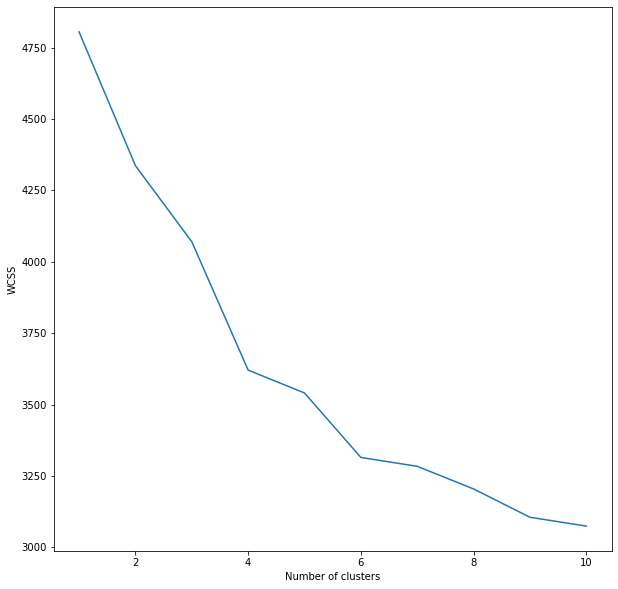

In [13]:
wcss = []
for i in range(1,11):
   kmeans = KMeans(n_clusters = i, init = "k-means++")
   kmeans.fit(pca_result)
   wcss.append(kmeans.inertia_)
   print('Number of clusters:',i)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

silhouette_score of 2 clusters is: 0.1568734686830686
silhouette_score of 3 clusters is: 0.1923608913387054
silhouette_score of 4 clusters is: 0.23263237259396963
silhouette_score of 5 clusters is: 0.2605748213353883
silhouette_score of 6 clusters is: 0.24329653483615232
silhouette_score of 7 clusters is: 0.24912835221305435
silhouette_score of 8 clusters is: 0.24797694203608087
silhouette_score of 9 clusters is: 0.2569212203316684
silhouette_score of 10 clusters is: 0.219714180372597
silhouette_score of 11 clusters is: 0.27199370838212167


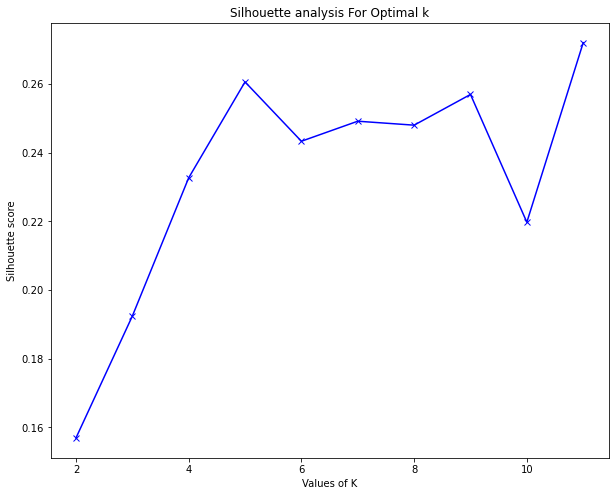

In [14]:
range_n_clusters = [i for i in range(2,12)]
silhouette_avg = []
for num_clusters in range_n_clusters:
     # initialise kmeans
     kmeans = KMeans(n_clusters=num_clusters)
     kmeans.fit(pca_result)
     #cluster_labels= kmeans.labels_
     # silhouette score
     print(f'silhouette_score of {num_clusters} clusters is:',silhouette_score(pca_result, kmeans.labels_, metric='euclidean'))   
     silhouette_avg.append(silhouette_score(pca_result, kmeans.labels_, metric='euclidean'))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans = kmeans.fit(pca_result)
kmeans.labels_
# "predictions" for new data
predictions = kmeans.predict(pca_result)

In [16]:
tweets['clusters']=kmeans.labels_
tweets['clusters'].value_counts()

8    3200
9     753
2     505
5     479
4     419
1     324
7     285
0     121
6     102
3      82
Name: clusters, dtype: int64

In [17]:
tweets=tweets[(tweets['clusters']==1)|(tweets['clusters']==2)|(tweets['clusters']==3)|(tweets['clusters']==4)|(tweets['clusters']==9)]

In [18]:
tweets.head()

,date,tweet_id,tweet,username,retweets,likes,id,tweet_cleaned,clusters
0,2022-04-16,1515284652889722880,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,1,royal society player rumble kong league lazy l...,2
6,2022-04-16,1515194035568361475,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,1,7,royal society player rumble kong league lazy l...,2
10,2022-04-15,1515103488518283278,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,11,royal society player rumble kong league lazy l...,2
14,2022-04-15,1515012912376602624,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,15,royal society player rumble kong league lazy l...,2
22,2022-04-15,1514922259210776584,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,1,23,royal society player rumble kong league lazy l...,2


In [19]:
tweets['likes'].describe()

count    2083.000000
mean        3.079693
std        26.804149
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max      1176.000000
Name: likes, dtype: float64

In [20]:
tweets['retweets'].describe()

count    2083.000000
mean        0.793087
std        18.403053
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       836.000000
Name: retweets, dtype: float64

In [21]:
tweets['popular_tweet']=(tweets['retweets']>np.percentile(tweets['retweets'],75)) | (tweets['likes']>np.percentile(tweets['likes'],75))
tweets['very_popular_tweet']=(tweets['retweets']>np.percentile(tweets['retweets'],95)) | (tweets['likes']>np.percentile(tweets['likes'],95))

In [22]:
tweets.head()

,date,tweet_id,tweet,username,retweets,likes,id,tweet_cleaned,clusters,popular_tweet,very_popular_tweet
0,2022-04-16,1515284652889722880,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,1,royal society player rumble kong league lazy l...,2,False,False
6,2022-04-16,1515194035568361475,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,1,7,royal society player rumble kong league lazy l...,2,False,False
10,2022-04-15,1515103488518283278,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,11,royal society player rumble kong league lazy l...,2,False,False
14,2022-04-15,1515012912376602624,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,15,royal society player rumble kong league lazy l...,2,False,False
22,2022-04-15,1514922259210776584,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,1,23,royal society player rumble kong league lazy l...,2,False,False


In [23]:
tweets['popular_tweet'].value_counts()

False    1587
True      496
Name: popular_tweet, dtype: int64

In [24]:
tweets['very_popular_tweet'].value_counts()

False    1961
True      122
Name: very_popular_tweet, dtype: int64

In [25]:
tweets['word_count'] = tweets['tweet_cleaned'].apply(lambda x : len(x.split()))

In [26]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [27]:
tweets['sentiment_results'] = tweets['tweet_cleaned'].apply(get_sentiment)
#tweets =tweets.join(pd.json_normalize(tweets['sentiment_results']))

In [28]:
len(tweets)

2083

In [29]:
sentiment=pd.json_normalize(tweets['sentiment_results'])

In [30]:
len(tweets),len(sentiment)

(2083, 2083)

In [31]:
tweets=tweets.reset_index()
sentiment=sentiment.reset_index()

In [32]:
tweets=(pd.concat([tweets,sentiment],axis=1))

In [33]:
tweets.tail()

,index,date,tweet_id,tweet,username,retweets,likes,id,tweet_cleaned,clusters,popular_tweet,very_popular_tweet,word_count,sentiment_results,index,polarity,subjectivity,sentiment
2078,5628,2021-10-19,1450516286719545350,The #1 Collection by Volume (last 10 mins):\np...,spr3adsh33t,0,2,5625,collection volume last min parallel parallelal...,4,False,False,19,"{'polarity': 0.09375, 'subjectivity': 0.329166...",2078,0.09375,0.329167,Positive
2079,5985,2021-08-27,1431289478530928641,Top 5 trending NFT collectibles on OpenSea ove...,JohnTodaro1,0,4,5982,top trending nft collectible opensea week cryp...,9,True,False,18,"{'polarity': -0.125, 'subjectivity': 0.575, 's...",2079,-0.12500,0.575000,Negative
2080,6000,2021-08-26,1430815649690005508,The #1 Collection by Volume (last 10 mins):\np...,spr3adsh33t,0,0,5997,collection volume last min parallel parallelal...,4,False,False,19,"{'polarity': 0.09375, 'subjectivity': 0.329166...",2080,0.09375,0.329167,Positive
2081,6001,2021-08-26,1430803023211683842,The #1 Collection by Volume (last 10 mins):\np...,spr3adsh33t,0,0,5998,collection volume last min parallel parallelal...,4,False,False,19,"{'polarity': 0.09375, 'subjectivity': 0.329166...",2081,0.09375,0.329167,Positive
2082,6030,2021-08-24,1429982308799553541,The #1 Collection by Volume (last 10 mins):\np...,spr3adsh33t,0,0,6029,collection volume last min parallel parallelal...,4,False,False,19,"{'polarity': 0.09375, 'subjectivity': 0.329166...",2082,0.09375,0.329167,Positive


In [34]:
tweets.isnull().sum()

index                 0
date                  0
tweet_id              0
tweet                 0
username              0
retweets              0
likes                 0
id                    0
tweet_cleaned         0
clusters              0
popular_tweet         0
very_popular_tweet    0
word_count            0
sentiment_results     0
index                 0
polarity              0
subjectivity          0
sentiment             0
dtype: int64

In [35]:
tweets['readability']=[flesch_reading_ease(i) for i in tweets['tweet_cleaned'].apply(str)]

In [36]:
tweets.head()

,index,date,tweet_id,tweet,username,retweets,likes,id,tweet_cleaned,clusters,popular_tweet,very_popular_tweet,word_count,sentiment_results,index,polarity,subjectivity,sentiment,readability
0,0,2022-04-16,1515284652889722880,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,1,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",0,-0.125,0.5,Negative,22.75
1,6,2022-04-16,1515194035568361475,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,1,7,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",1,-0.125,0.5,Negative,22.75
2,10,2022-04-15,1515103488518283278,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,11,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",2,-0.125,0.5,Negative,22.75
3,14,2022-04-15,1515012912376602624,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,15,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",3,-0.125,0.5,Negative,22.75
4,22,2022-04-15,1514922259210776584,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,1,23,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",4,-0.125,0.5,Negative,22.75


In [37]:
df = tweets.copy()

In [38]:
df['date']=pd.to_datetime(df['date'])
df['day']=df['date'].dt.day
df['week']=df['date'].dt.week
df['month']=df['date'].dt.month

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


<AxesSubplot:>

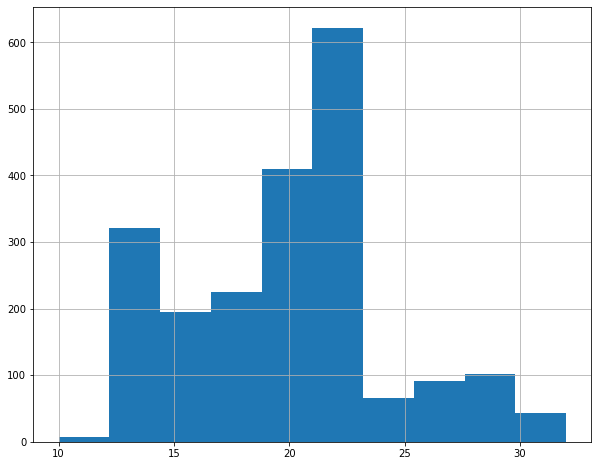

In [39]:
df['word_count'].hist()

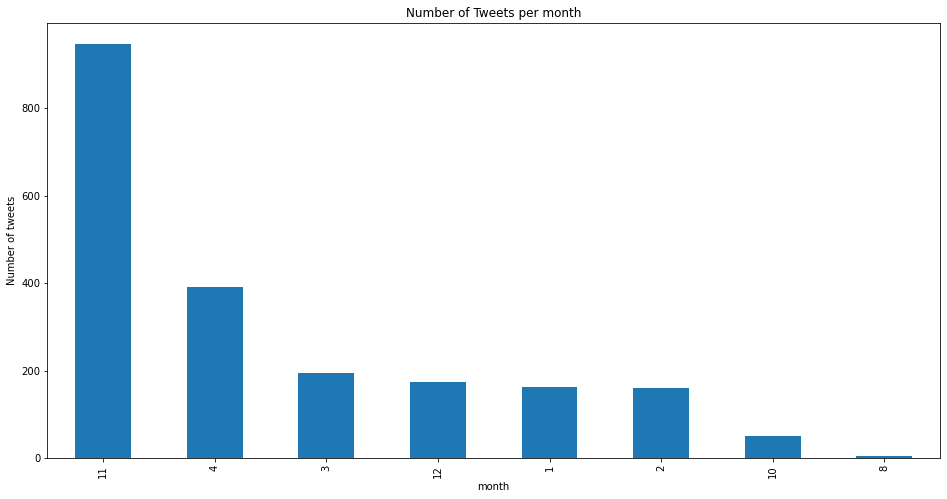

In [40]:
plt.figure(figsize=(16,8))
df['month'].value_counts().plot(kind='bar')
plt.title('Number of Tweets per month')
plt.xlabel('month')
plt.ylabel('Number of tweets');

In [41]:
parallel=pd.read_sql_query("SELECT * FROM parallel_alpha_trades",conn)
parallel.tail()

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


,chain,collectionaddress,collectionname,exchange,logindex,maker,price,quotecurrency,side,taker,thumbnailurl,timestamp,tokenid,tx,txindex,id
131357,eth,0x76be3b62873462d2142405439777e971754e8e77,Parallel Alpha,opensea,153,0xe20f75642b97c11af651a81afcbbc6d7b4e32981,0.4200,ETH,buy,0xa8c045e857c1c4550119b612f22c3b27ece10340,https://storage.googleapis.com/parsec-nft-stor...,1625339709,87.0,0x2b9d31835cc90cf9206534c7da9dffd7edfbd4b900b4...,76.0,131358
131358,eth,0x76be3b62873462d2142405439777e971754e8e77,Parallel Alpha,opensea,-1,0xc8301d3780efff7ee9fc579ab3b78aa5d6885a0a,0.4500,ETH,buy,0x41797b5e0398af475422f6f33f2dc81d9a24ae33,https://storage.googleapis.com/parsec-nft-stor...,1625323718,87.0,0x03d2923e72231726b99cda79073188cfb19195595530...,59.0,131359
131359,eth,0x76be3b62873462d2142405439777e971754e8e77,Parallel Alpha,opensea,193,0xe20f75642b97c11af651a81afcbbc6d7b4e32981,0.3800,ETH,buy,0xf2327b04521589f505c7074c163805843a4bd6cd,https://storage.googleapis.com/parsec-nft-stor...,1625275386,87.0,0xd3168d526e49d9f361e0f8d5dec7e7d5b91733f72b0e...,116.0,131360
131360,eth,0x76be3b62873462d2142405439777e971754e8e77,Parallel Alpha,opensea,198,0x52d7e31678d712ee8c15ca5af10babc257e5b61a,0.3500,ETH,buy,0x167539702b5501aadd9b0b85e53532fd57cc71a9,https://storage.googleapis.com/parsec-nft-stor...,1625220839,73.0,0x180169adcc282d403943b1a6c74a55c921547455adf4...,146.0,131361
131361,eth,0x76be3b62873462d2142405439777e971754e8e77,Parallel Alpha,opensea,75,0x98c45d5ea9ccd8278fe43ba740e967a49cd19e6e,0.0099,ETH,buy,0x1c73c6174eb2fddc2e0a702e85cd3146c05aa122,https://storage.googleapis.com/parsec-nft-stor...,1625177755,10089.0,0x56d15482b8e9433db79c4fcfb0788e384cb38ec027aa...,40.0,131362


In [42]:
from datetime import datetime
parallel['date']=parallel['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [43]:
parallel['date']=pd.to_datetime(parallel['date'])
#parallel=parallel[parallel['date']>'2021-08-08']

In [44]:
#parallel=parallel[parallel['price']>=0]

In [45]:
df.head()

,index,date,tweet_id,tweet,username,retweets,likes,id,tweet_cleaned,clusters,popular_tweet,very_popular_tweet,word_count,sentiment_results,index,polarity,subjectivity,sentiment,readability,day,week,month
0,0,2022-04-16,1515284652889722880,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,1,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",0,-0.125,0.5,Negative,22.75,16,15,4
1,6,2022-04-16,1515194035568361475,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,1,7,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",1,-0.125,0.5,Negative,22.75,16,15,4
2,10,2022-04-15,1515103488518283278,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,11,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",2,-0.125,0.5,Negative,22.75,15,15,4
3,14,2022-04-15,1515012912376602624,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,15,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",3,-0.125,0.5,Negative,22.75,15,15,4
4,22,2022-04-15,1514922259210776584,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,1,23,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",4,-0.125,0.5,Negative,22.75,15,15,4


In [46]:
df.head(1)

,index,date,tweet_id,tweet,username,retweets,likes,id,tweet_cleaned,clusters,popular_tweet,very_popular_tweet,word_count,sentiment_results,index,polarity,subjectivity,sentiment,readability,day,week,month
0,0,2022-04-16,1515284652889722880,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,0,1,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",0,-0.125,0.5,Negative,22.75,16,15,4


In [47]:
df.tail(10)

,index,date,tweet_id,tweet,username,retweets,likes,id,tweet_cleaned,clusters,popular_tweet,very_popular_tweet,word_count,sentiment_results,index,polarity,subjectivity,sentiment,readability,day,week,month
2073,5515,2021-10-23,1451888645208690702,Top 10 Trending #NFT Collections Past Hour:\n\...,StickyDAO,0,7,5512,top trending nft collection past hour og cryst...,9,True,False,15,"{'polarity': -0.0625, 'subjectivity': 0.4375, ...",2073,-0.062500,0.437500,Negative,47.79,23,42,10
2074,5536,2021-10-23,1451707453087920130,Top 10 Trending #NFT Collections Past Hour:\n\...,StickyDAO,0,2,5533,top trending nft collection past hour parallel...,9,False,False,15,"{'polarity': 0.08333333333333333, 'subjectivit...",2074,0.083333,0.250000,Positive,56.25,23,42,10
2075,5540,2021-10-22,1451692351747936284,Top 10 Trending #NFT Collections Past Hour:\n\...,StickyDAO,0,0,5537,top trending nft collection past hour parallel...,9,False,False,14,"{'polarity': 0.08333333333333333, 'subjectivit...",2075,0.083333,0.250000,Positive,48.81,22,42,10
2076,5544,2021-10-22,1451677252131958787,Top 10 Trending #NFT Collections Past Hour:\n\...,StickyDAO,1,5,5541,top trending nft collection past hour alpacada...,9,True,False,16,"{'polarity': 0.08333333333333333, 'subjectivit...",2076,0.083333,0.250000,Positive,38.32,22,42,10
2077,5590,2021-10-21,1451239368274874372,Top 10 Trending #NFT Collections Past Hour:\n\...,StickyDAO,1,1,5587,top trending nft collection past hour creature...,9,True,False,15,"{'polarity': 0.08333333333333333, 'subjectivit...",2077,0.083333,0.250000,Positive,47.79,21,42,10
2078,5628,2021-10-19,1450516286719545350,The #1 Collection by Volume (last 10 mins):\np...,spr3adsh33t,0,2,5625,collection volume last min parallel parallelal...,4,False,False,19,"{'polarity': 0.09375, 'subjectivity': 0.329166...",2078,0.093750,0.329167,Positive,52.19,19,42,10
2079,5985,2021-08-27,1431289478530928641,Top 5 trending NFT collectibles on OpenSea ove...,JohnTodaro1,0,4,5982,top trending nft collectible opensea week cryp...,9,True,False,18,"{'polarity': -0.125, 'subjectivity': 0.575, 's...",2079,-0.125000,0.575000,Negative,53.21,27,34,8
2080,6000,2021-08-26,1430815649690005508,The #1 Collection by Volume (last 10 mins):\np...,spr3adsh33t,0,0,5997,collection volume last min parallel parallelal...,4,False,False,19,"{'polarity': 0.09375, 'subjectivity': 0.329166...",2080,0.093750,0.329167,Positive,52.19,26,34,8
2081,6001,2021-08-26,1430803023211683842,The #1 Collection by Volume (last 10 mins):\np...,spr3adsh33t,0,0,5998,collection volume last min parallel parallelal...,4,False,False,19,"{'polarity': 0.09375, 'subjectivity': 0.329166...",2081,0.093750,0.329167,Positive,52.19,26,34,8
2082,6030,2021-08-24,1429982308799553541,The #1 Collection by Volume (last 10 mins):\np...,spr3adsh33t,0,0,6029,collection volume last min parallel parallelal...,4,False,False,19,"{'polarity': 0.09375, 'subjectivity': 0.329166...",2082,0.093750,0.329167,Positive,52.19,24,34,8


In [48]:
df.isnull().sum()

index                 0
date                  0
tweet_id              0
tweet                 0
username              0
retweets              0
likes                 0
id                    0
tweet_cleaned         0
clusters              0
popular_tweet         0
very_popular_tweet    0
word_count            0
sentiment_results     0
index                 0
polarity              0
subjectivity          0
sentiment             0
readability           0
day                   0
week                  0
month                 0
dtype: int64

In [49]:
df['date'].min(), df['date'].max()

(Timestamp('2021-08-24 00:00:00'), Timestamp('2022-04-16 00:00:00'))

In [50]:
parallel['date'].min(), parallel['date'].max()

(Timestamp('2021-07-01 22:15:55'), Timestamp('2022-04-12 23:04:09'))

In [51]:
df=df[df['date']<='2022-04-12']
parallel=parallel[parallel['date']>'2021-08-09']

In [52]:
len(df)

1883

In [53]:
df.isnull().sum()

index                 0
date                  0
tweet_id              0
tweet                 0
username              0
retweets              0
likes                 0
id                    0
tweet_cleaned         0
clusters              0
popular_tweet         0
very_popular_tweet    0
word_count            0
sentiment_results     0
index                 0
polarity              0
subjectivity          0
sentiment             0
readability           0
day                   0
week                  0
month                 0
dtype: int64

In [54]:
parallel=parallel.groupby([pd.Grouper(key='date', freq='d'),  'collectionname']).agg({
    'maker':['nunique'],
    'taker':['nunique'],
    'thumbnailurl':['nunique'],
    'tx':['nunique'],
    'price':['median']})

In [55]:
df.head(1)

,index,date,tweet_id,tweet,username,retweets,likes,id,tweet_cleaned,clusters,popular_tweet,very_popular_tweet,word_count,sentiment_results,index,polarity,subjectivity,sentiment,readability,day,week,month
200,240,2022-04-12,1514016287831334916,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,1,240,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",200,-0.125,0.5,Negative,22.75,12,15,4


In [56]:
agg_df=df.groupby([pd.Grouper(key='date', freq='d')]).agg({
    'word_count':['mean'],
    'popular_tweet':'first',
    'very_popular_tweet':'first',
    'readability':['mean'],
    'sentiment':'first'})

In [57]:
len(agg_df),len(parallel)

(232, 247)

In [58]:
def flatten_columns(df, prefix=''):
    columns = []
    for cs in df:
        if type(cs) is str:
            cs = re.sub('\W+','_', cs)
        elif type(cs) is not list and type(cs) is not tuple:
            print (cs)
            cs = str(cs)
        else:
            cs = re.sub("\W+", "", "".join([str(c) for c in cs]))
        cs = cs.lower()
        if prefix:
            cs = prefix + '' + cs
        cs = re.sub('\+$', '', cs)
        columns.append(cs)
    return columns

In [59]:
agg_df.columns=flatten_columns(agg_df)
parallel.columns=flatten_columns(parallel)

In [60]:
agg_df=agg_df.reset_index()
parallel=parallel.reset_index()

In [61]:
df.head()

,index,date,tweet_id,tweet,username,retweets,likes,id,tweet_cleaned,clusters,popular_tweet,very_popular_tweet,word_count,sentiment_results,index,polarity,subjectivity,sentiment,readability,day,week,month
200,240,2022-04-12,1514016287831334916,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,0,1,240,royal society player rumble kong league lazy l...,2,False,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",200,-0.125,0.5,Negative,22.75,12,15,4
201,243,2022-04-12,1513925715783299074,Royal Society of Players: 0.12 Ξ\nRumble Kong ...,nftflooralerts,1,2,243,royal society player rumble kong league lazy l...,2,True,False,23,"{'polarity': -0.125, 'subjectivity': 0.5, 'sen...",201,-0.125,0.5,Negative,22.75,12,15,4
202,244,2022-04-12,1513903051542773760,Parallel Alpha was just listed for 0.17 ETH. \...,nft_watcher_bot,0,3,244,parallel alpha listed eth http co ba bzrcpo nf...,1,True,False,14,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",202,0.000,0.0,Neutral,48.81,12,15,4
203,245,2022-04-12,1513902025116901378,Parallel Alpha was just listed for 0.0014 ETH....,nft_watcher_bot,0,1,245,parallel alpha listed eth http co z ow l saw n...,1,False,False,16,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",203,0.000,0.0,Neutral,55.24,12,15,4
204,246,2022-04-12,1513899787468292102,Parallel Alpha was just listed for 0.027 ETH. ...,nft_watcher_bot,0,0,246,parallel alpha listed eth http co kfmx cp nft ...,1,False,False,14,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",204,0.000,0.0,Neutral,57.27,12,15,4


In [62]:
parallel.head()

,date,collectionname,makernunique,takernunique,thumbnailurlnunique,txnunique,pricemedian
0,2021-08-09,Parallel Alpha,335,294,99,665,0.090
1,2021-08-10,Parallel Alpha,330,247,102,626,0.098
2,2021-08-11,Parallel Alpha,258,187,101,445,0.094
3,2021-08-12,Parallel Alpha,276,252,99,526,0.115
4,2021-08-13,Parallel Alpha,354,277,117,726,0.111


In [63]:
parallel=parallel.rename(columns={'pricemedian':'median_price',
                  'makernunique':'num_of_sellers','takernunique':'number_of_buyers','thumbnailurlnunique':'volume_of_assets_traded',
                  'txnunique':'number_of_transcations_index'})

In [64]:
len(parallel),len(agg_df)

(247, 232)

In [65]:
parallel.head(2)

,date,collectionname,num_of_sellers,number_of_buyers,volume_of_assets_traded,number_of_transcations_index,median_price
0,2021-08-09,Parallel Alpha,335,294,99,665,0.090
1,2021-08-10,Parallel Alpha,330,247,102,626,0.098


<AxesSubplot:>

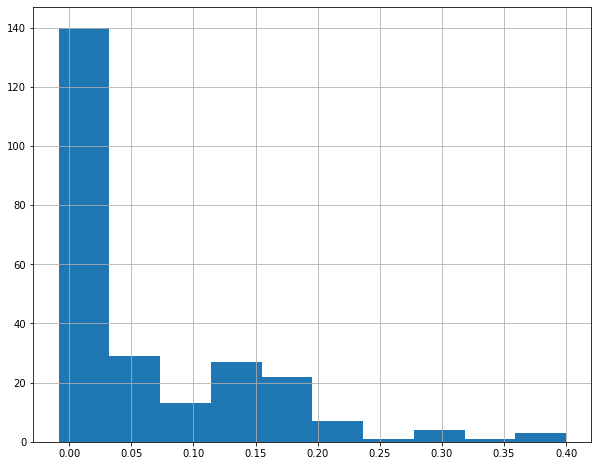

In [66]:
parallel['median_price'].hist()

KeyError: 'index'

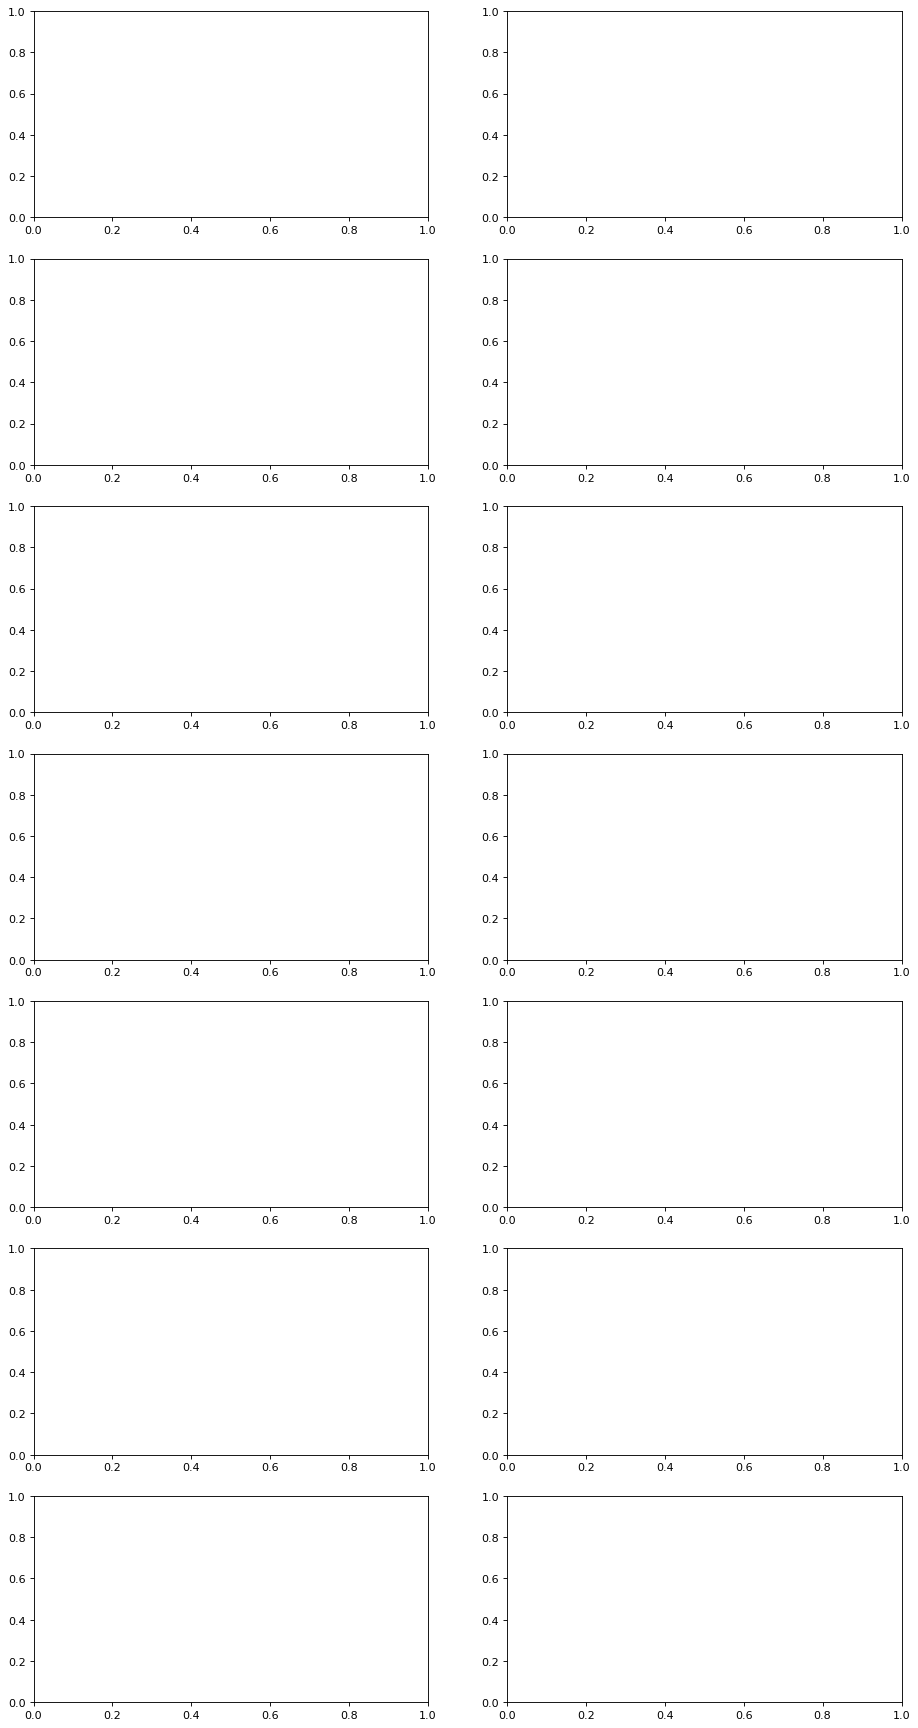

In [67]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(parallel)

In [68]:
parallel.head()

,date,collectionname,num_of_sellers,number_of_buyers,volume_of_assets_traded,number_of_transcations_index,median_price
0,2021-08-09,Parallel Alpha,335,294,99,665,0.090
1,2021-08-10,Parallel Alpha,330,247,102,626,0.098
2,2021-08-11,Parallel Alpha,258,187,101,445,0.094
3,2021-08-12,Parallel Alpha,276,252,99,526,0.115
4,2021-08-13,Parallel Alpha,354,277,117,726,0.111


In [69]:
agg_df.head(1)

,date,word_countmean,popular_tweetfirst,very_popular_tweetfirst,readabilitymean,sentimentfirst
0,2021-08-24,19.0,0.0,0.0,52.19,Positive


In [70]:
agg_df['date'].min(),agg_df['date'].max()


(Timestamp('2021-08-24 00:00:00'), Timestamp('2022-04-12 00:00:00'))

In [71]:
parallel['date'].min(),parallel['date'].max()

(Timestamp('2021-08-09 00:00:00'), Timestamp('2022-04-12 00:00:00'))

In [ ]:
agg_df=agg_df.reset_index()
parallel=parallel.reset_index()

In [ ]:
(agg_df.merge(parallel,on='date'))

In [ ]:
agg_df['num_of_sellers']=parallel['num_of_sellers']
agg_df['date']=parallel['date']
agg_df['number_of_buyers']=parallel['number_of_buyers']
agg_df['volume_of_assets_traded']=parallel['volume_of_assets_traded']
agg_df['number_of_transcations_index']=parallel['number_of_transcations_index']
agg_df['median_price']=parallel['median_price']

In [ ]:
agg_df.tail()

In [ ]:
agg_df.isnull().sum()

In [ ]:
corr_matrix = agg_df.corr()
(corr_matrix["median_price"].sort_values(ascending=False))[:20]

In [ ]:
df.head()

In [ ]:
agg_df[['median_price']].plot(kind='line')

In [ ]:
pd.plotting.lag_plot(agg_df['median_price'],lag=1)

In [ ]:
pd.plotting.lag_plot(agg_df['median_price'],lag=7)

In [ ]:
pd.plotting.lag_plot(agg_df['median_price'],lag=30)

In [ ]:
g = sns.heatmap(corr_matrix,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
    
plt.show()

In [ ]:
result = adfuller(agg_df['median_price'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

In [ ]:
dsdss

In [ ]:
agg_df['date'].min(),agg_df['date'].max()

In [ ]:
#split data into train and test sets
split_date ='2022-03-01'
df_train = df.loc[df.date <= split_date].copy()
df_test = df.loc[df.date > split_date].copy()

In [ ]:
len(df_train), len(df_test)

In [ ]:
agg_df.head()

In [ ]:
agg_df=agg_df.dropna()

In [ ]:
agg_df.isnull().sum()

In [ ]:
len(agg_df)

In [ ]:
def create_features(df, label=None):
    """
    Creates features from column index
    """
    
    X = df[['num_of_sellers','number_of_buyers','volume_of_assets_traded','number_of_transcations_index','median_price']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
#Split train and test sets into X (features) and y - (label)
X_train, y_train = create_features(df_train, label='floor_price')
X_test, y_test = create_features(df_test, label='floor_price')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
#Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
param_grid = { 
    'n_estimators': [50,70,60],
    'max_depth': [3,5,4],
    'min_samples_split':[2,3,4]
}
reg = RandomForestRegressor(random_state=0,verbose=0,oob_score=True)
cv_xgb = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5,verbose=0)

cv_xgb.fit(X_train, y_train)
yhat = cv_xgb.best_estimator_.predict(X_test)

In [ ]:
cv_xgb.best_params_

In [ ]:
err=pd.DataFrame({'prediction':yhat,'actual': y_test, 'error':y_test-yhat})
err['error'].describe()

In [ ]:
df['floor_price'].describe()

In [ ]:
#score the model
mae = mean_absolute_error(yhat,y_test)
print("MAE:", mae)

In [ ]:
#score the model
rmse = np.sqrt(mean_squared_error(yhat,y_test))
print("RMSE:", rmse)

In [ ]:
import scipy

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(yhat, y_test)
'Pvalue:',p_value,'Rvalue:',r_value

In [ ]:
sns.regplot(yhat, y_test)

In [ ]:
explainer = shap.TreeExplainer(cv_xgb.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

### Prophet

In [ ]:
df.head(2)

In [ ]:
df_prophet=df.reset_index()[['date','floor_price','median_price','num_of_sellers','number_of_buyers','volume_of_assets_traded',
                             'number_of_transcations_index']].rename({'date':'ds','floor_price':'y'}, axis='columns')

In [ ]:
df_prophet.head()

In [ ]:
ax = df_prophet.set_index('ds')['y'].plot(figsize=(12, 8))
ax.set_ylabel('Floor price of parallel alpha nft')
ax.set_xlabel('Date')

plt.show()

In [ ]:
#features=normalize(df_prophet.drop(columns=['ds','y']))

In [ ]:
#Scale the data
#scaler = MinMaxScaler()
#features = scaler.fit_transform(df_prophet.drop(columns=['ds','y']))

In [ ]:
#features=pd.DataFrame(features)

In [ ]:
#labels=df_prophet[['ds','y']]

In [ ]:
#df_prophet=pd.concat([features,labels],axis=1)

In [ ]:
df_prophet.head()

In [ ]:
model = Prophet(interval_width=0.5,growth='logistic')
model.add_regressor('num_of_sellers')
model.add_regressor('number_of_buyers')
model.add_regressor('volume_of_assets_traded')
model.add_regressor('number_of_transcations_index')
model.add_regressor('median_price')

In [ ]:
df_prophet['cap'] = 0.16
df_prophet['floor'] = 0


In [ ]:
model.fit(df_prophet)


In [ ]:
future_dates=model.make_future_dataframe(periods=7, freq='d')
future_dates.tail(7)

In [ ]:
future_dates

In [ ]:
future_dates['cap'] = 0.16
future_dates['floor'] = 0
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [ ]:
#forecast['yhat']=np.abs(forecast['yhat'])

In [ ]:
model.plot(forecast, uncertainty=True)

In [ ]:
model.plot_components(forecast)

In [ ]:
fig1 = model.plot_components(forecast)

In [ ]:
forecast['yhat'].describe()

In [ ]:
forecast[['ds','yhat']].tail(15)

In [ ]:
ax = forecast.set_index('ds')['yhat'].plot(figsize=(12, 8))
ax.set_ylabel('volume of assets of parallel alpha')
ax.set_xlabel('Date')

plt.show()

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = model, initial = '200 days', horizon = '7 days')
df_p = performance_metrics(cv_results)
df_p

In [ ]:
df_p['mae'].mean()

In [ ]:
df_p['rmse'].mean()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mae')

In [ ]:
### LSTM